# コンフュージョンマトリックス

## サンプルデータで学習

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# アヤメのデータセットをロード
iris = datasets.load_iris()
X_dataset = iris.data
y_dataset = iris.target

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_dataset,
                                                    y_dataset,
                                                    test_size=0.5,
                                                    random_state=42)

# 学習と推論を実行
clf = SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)

## コンフュージョンマトリックスを生成

In [2]:
from sklearn.metrics import confusion_matrix

# コンフュージョンマトリックスを生成
cnf_matrix = confusion_matrix(y_test, y_pred)

cnf_matrix

array([[29,  0,  0],
       [ 0, 23,  0],
       [ 0,  1, 22]])

## コンフュージョンマトリックスをプロット

Text(51,0.5,u'True Class')

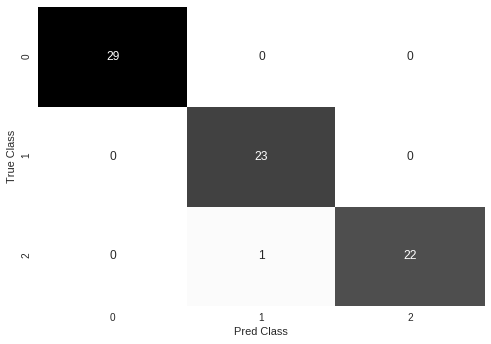

In [3]:
# コンフュージョンマトリックスをプロット
import seaborn as sns
ax = sns.heatmap(data=cnf_matrix, annot=True, cbar=False, cmap='Greys')
ax.set_xlabel('Pred Class')
ax.set_ylabel('True Class')

# Precision Recall

## サンプルデータで学習

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 乳がんのデータをロード
X_dataset, y_dataset = load_breast_cancer(return_X_y=True)

# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)

# ランダムフォレスト
clf = RandomForestClassifier(random_state=42)

## 各メトリクスを算出

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  
  print('Accuracy: {}'.format(accuracy))
  print('Precision: {}'.format(precision))
  print('Recall: {}'.format(recall))
  print(cm)

## ハイパーパラメータを変えて評価

In [6]:
# n_estimatorsを6、max_depthを1で学習
clf.n_estimators = 6
clf.max_depth = 1
clf.fit(X_train, y_train)
# 推論し各種評価値をプリント
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

# n_estimatorsを5、max_depthを6で学習
clf.n_estimators = 5
clf.max_depth = 6
clf.fit(X_train, y_train)
# 推論し各種評価値をプリント
y_pred = clf.predict(X_test)
print_metrics(y_test, y_pred)

Accuracy: 0.938596491228
Precision: 0.910256410256
Recall: 1.0
[[36  7]
 [ 0 71]]
Accuracy: 0.956140350877
Precision: 0.958333333333
Recall: 0.971830985915
[[40  3]
 [ 2 69]]


# グリッドサーチ

## 探索するパラメータを与えて学習

In [7]:
from sklearn.model_selection import GridSearchCV

# 評価値
scoring = {
  'Precision': 'precision',
  'Recall': 'recall'
}
# 探索するパラメータ
params = {
  'n_estimators': range(1, 11),
  'max_depth': range(1, 11)
}

gs = GridSearchCV(clf, param_grid=params,
                  scoring=scoring, refit='Recall')
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit='Recall', return_train_score='warn',
       scoring={'Recall': 'recall', 'Precision': 'precision'}, verbose=0)

## 最適なパラメータとそのスコアを表示

In [8]:
print('Best Params: {}'.format(gs.best_params_))
print('Best Recall Score: {}'.format(gs.best_score_))

Best Params: {'n_estimators': 9, 'max_depth': 6}
Best Recall Score: 0.972034412955


## グリッドサーチ結果をプロット

In [9]:
import pandas as pd
import seaborn as sns

# pandasのDataFrameに変換
df = pd.DataFrame(gs.cv_results_)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_Recall'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_Precision'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecati

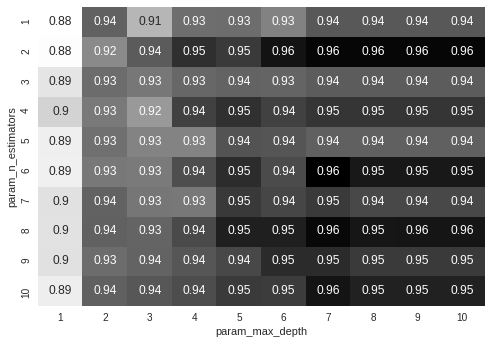

In [10]:
# ピボットでヒートマップの形にする(Precision)
df_precision = df.pivot(index='param_n_estimators',
                        columns='param_max_depth',
                        values='mean_test_Precision')
sns.heatmap(df_precision, annot=True, cbar=False, cmap='Greys')

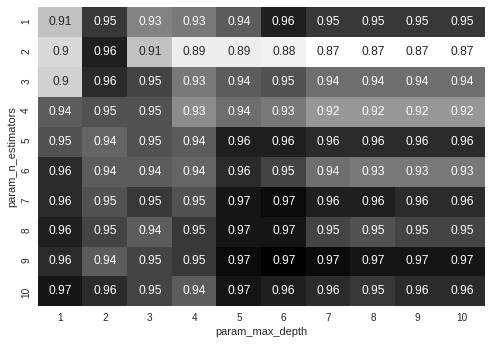

In [11]:
# ピボットでヒートマップの形にする(Recall)
df_recall = df.pivot(index='param_n_estimators',
                     columns='param_max_depth',
                     values='mean_test_Recall')
sns.heatmap(df_recall, annot=True, cbar=False, cmap='Greys')